In [22]:
# import all Required libaires
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [50]:
# read_data 

helthcare_data = pd.read_csv('D:\\prediction\\monthlyCarSalesData.csv')
print(helthcare_data.head(100))

"""
# separete data 

y = helthcare_data['Month']

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y.head(5))"""


      Month  Sales
0   1960-01   6550
1   1960-02   8728
2   1960-03  12026
3   1960-04  14395
4   1960-05  14587
5   1960-06  13791
6   1960-07   9498
7   1960-08   8251
8   1960-09   7049
9   1960-10   9545
10  1960-11   9364
11  1960-12   8456
12  1961-01   7237
13  1961-02   9374
14  1961-03  11837
15  1961-04  13784
16  1961-05  15926
17  1961-06  13821
18  1961-07  11143
19  1961-08   7975
20  1961-09   7610
21  1961-10  10015
22  1961-11  12759
23  1961-12   8816
24  1962-01  10677
25  1962-02  10947
26  1962-03  15200
27  1962-04  17010
28  1962-05  20900
29  1962-06  16205
..      ...    ...
70  1965-11  17697
71  1965-12  16611
72  1966-01  12674
73  1966-02  12760
74  1966-03  20249
75  1966-04  22135
76  1966-05  20677
77  1966-06  19933
78  1966-07  15388
79  1966-08  15113
80  1966-09  13401
81  1966-10  16135
82  1966-11  17562
83  1966-12  14720
84  1967-01  12225
85  1967-02  11608
86  1967-03  20985
87  1967-04  19692
88  1967-05  24081
89  1967-06  22114
90  1967-07 

"\n# separete data \n\ny = helthcare_data['Month']\n\n# The term bfill means that we use the value before filling in missing values\ny = y.fillna(y.bfill())\n\nprint(y.head(5))"

            Sales
Month            
1960-01-01   6550
1960-02-01   8728
1960-03-01  12026
1960-04-01  14395
1960-05-01  14587


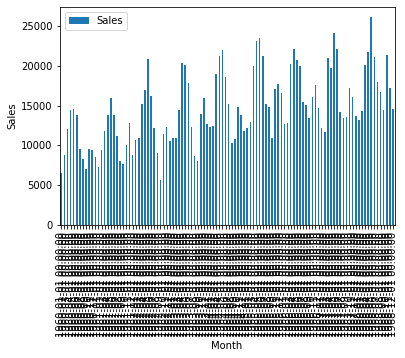

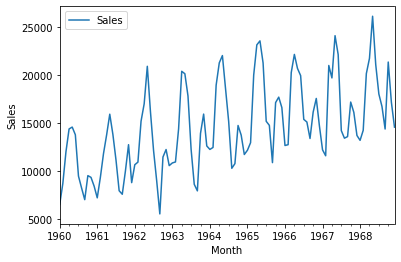

In [51]:
#changing year datatime format beaccause arima model working time series forecast 

helthcare_data['Month']=pd.to_datetime(helthcare_data['Month'])

helthcare_data.set_index(['Month'], inplace=True)

print(helthcare_data.head(5))

# Plot the data
# checiking Frequncy in Year Wise 

helthcare_data.plot(kind='bar')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()
helthcare_data.plot.line()
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

In [17]:
helthcare_data.describe()

,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


In [25]:
# Arima model intilation

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [28]:
# split the train and test and data 
train_data = helthcare_data[:'1967-12-01']
test_data = helthcare_data['1968-01-01':]


In [29]:
train_data

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
1960-06-01,13791
1960-07-01,9498
1960-08-01,8251
1960-09-01,7049


In [30]:
test_data

,Sales
Month,
1968-01-01,13210
1968-02-01,14251
1968-03-01,20139
1968-04-01,21725
1968-05-01,26099
1968-06-01,21084
1968-07-01,18024
1968-08-01,16722
1968-09-01,14385


In [31]:
# applly the data model 

warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [32]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 1223.8871030335051 for model SARIMAX(0, 1, 1)x(0, 1, 1, 12)


In [33]:
# Let's fit this model

mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [96]:
# predict the 2020 data

pred0 = results.get_forecast(steps=40)
pred0_ci = pred0.conf_int()

#print(pred0.predicted_mean['1980-01-01':'1980-07-01' ])

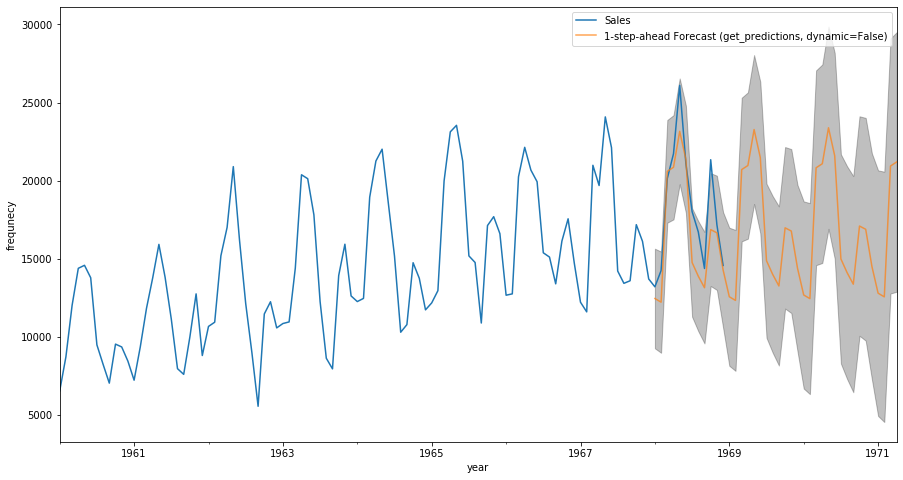

In [97]:
# predict the future prediction 2018- 2020


ax = helthcare_data.plot(figsize=(15, 8))
#ax = helthcare_data['1960':].plot(label='observed')
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)',alpha=.7)
#pred0.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')

#pred2.predicted_mean.plot(ax=ax, label='Forecast Frequency')
ax.fill_between(pred0_ci.index, pred0_ci.iloc[:, 0], pred0_ci.iloc[:, 1], color='k', alpha=.25)
plt.ylabel('frequnecy')
plt.xlabel('year')
plt.legend()
plt.show()

In [94]:
#checking error Rate in Your Predection 

# this part is very importatnt part


prediction = pred0.predicted_mean['1968-01-01':'1968-12-01'].values
# flatten nested list
truth = list(itertools.chain.from_iterable(test_data.values))
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((truth - prediction) / truth)) * 100

print('The Mean Absolute Percentage Error for the forecast of year 2019 is {:.2f}%'.format(MAPE))

The Mean Absolute Percentage Error for the forecast of year 2019 is 9.02%
